In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func



# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = ""
SQL_IP = "localhost"
PORT = 5432
DATABASE = "crowdfunding_db" 

In [16]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [17]:
# INSPECT

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
-----------
contact_id INTEGER
first_name VARCHAR(150)
last_name VARCHAR(150)
email VARCHAR(150)

campaign
-----------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR
description VARCHAR
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(50)
backers_count INTEGER
country VARCHAR
currency VARCHAR
launch_date DATE
end_date DATE
category_id VARCHAR
subcategory_id VARCHAR

Category
-----------
category_id VARCHAR
category_name VARCHAR

SubCategory
-----------
subcategory_id VARCHAR
subcategory_name VARCHAR



In [25]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.Category'>, <class 'sqlalchemy.ext.automap.campaign'>, <class 'sqlalchemy.ext.automap.contacts'>, <class 'sqlalchemy.ext.automap.SubCategory'>]


In [26]:
df = pd.read_csv("Resources/campaign.csv")
df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,2020-06-20,2021-01-30,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,2020-11-29,2021-06-11,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process impro...,142400.0,21307.0,failed,296,US,USD,2020-05-05,2021-05-30,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,2021-01-29,2021-02-13,cat1,subcat1


In [27]:
df.columns = [x.lower() for x in df.columns]
df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,2020-06-20,2021-01-30,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,2020-11-29,2021-06-11,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process impro...,142400.0,21307.0,failed,296,US,USD,2020-05-05,2021-05-30,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,2021-01-29,2021-02-13,cat1,subcat1


In [ ]:
df.to_sql("campaign", schema="public", con=engine, index=False, if_exists="append", method="multi")

In [33]:
# Create a session
session = Session(engine)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cf_id           1000 non-null   int64  
 1   contact_id      1000 non-null   int64  
 2   company_name    1000 non-null   object 
 3   description     1000 non-null   object 
 4   goal            1000 non-null   float64
 5   pledged         1000 non-null   float64
 6   outcome         1000 non-null   object 
 7   backers_count   1000 non-null   int64  
 8   country         1000 non-null   object 
 9   currency        1000 non-null   object 
 10  launch_date     1000 non-null   object 
 11  end_date        1000 non-null   object 
 12  category_id     1000 non-null   object 
 13  subcategory_id  1000 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 109.5+ KB


### Query


In [34]:
query = """
    SELECT
        company_name,
        goal,
        pledged,
        backers_count,
        country,
        launch_date,
        end_date
    FROM
        campaign
    WHERE
        outcome = 'successful';
"""
df = pd.read_sql(text(query), con=engine)
df.head()

,company_name,goal,pledged,backers_count,country,launch_date,end_date
0,Werner-Bryant,1800.0,7991.0,222,US,2020-06-20,2021-01-30
1,Stewart LLC,1300.0,12047.0,113,US,2020-11-29,2021-06-11
2,"Wright, Hartman and Yu",3300.0,12437.0,131,US,2021-01-29,2021-02-13
3,Rose-Silva,3300.0,14643.0,190,US,2021-01-30,2021-06-25
4,Baker Ltd,6300.0,14199.0,189,US,2021-04-18,2021-12-22


In [35]:
query = """
    SELECT
        category_id,
        SUM(pledged) AS total
    FROM
        campaign
    GROUP BY
        category_id;
"""
df = pd.read_sql(text(query), con=engine)
df.head()

,category_id,total
0,cat7,2015817.0
1,cat2,7480097.0
2,cat3,3833725.0
3,cat5,7510076.0
4,cat9,36176.0


In [36]:
query = """
    SELECT
        country,
        AVG(pledged / goal) AS avg_rate
    FROM
        campaign
    GROUP BY
        country;
"""
df = pd.read_sql(text(query), con=engine)
df.head()

,country,avg_rate
0,AU,1.703399
1,CA,2.144162
2,DK,2.004445
3,CH,2.331946
4,US,2.021169


In [37]:
query = """
    SELECT
        EXTRACT(MONTH FROM launch_date) AS launch_month,
        COUNT(*) AS campaign_count
    FROM
        campaign
    GROUP BY
        EXTRACT(MONTH FROM launch_date)
    ORDER BY
        launch_month;
"""

df = pd.read_sql(text(query), con=engine)
df.head()

,launch_month,campaign_count
0,1.0,86
1,2.0,83
2,3.0,90
3,4.0,93
4,5.0,87


In [97]:
query = """
SELECT
    category_id AS Row_Labels,
    SUM(CASE WHEN outcome = 'canceled' THEN 1 ELSE 0 END) AS canceled,
    SUM(CASE WHEN outcome = 'failed' THEN 1 ELSE 0 END) AS failed,
    SUM(CASE WHEN outcome = 'live' THEN 1 ELSE 0 END) AS live,
    SUM(CASE WHEN outcome = 'successful' THEN 1 ELSE 0 END) AS successful,
    COUNT(*) AS Grand_Total
FROM
    campaign
GROUP BY
    category_id
ORDER BY
    category_id;
"""

df = pd.read_sql(text(query), con=engine)
df.head(10)

,row_labels,canceled,failed,live,successful,grand_total
0,cat1,4,20,0,22,46
1,cat2,10,66,0,99,175
2,cat3,2,28,2,64,96
3,cat4,23,132,2,187,344
4,cat5,11,60,5,102,178
5,cat6,2,24,1,40,67
6,cat7,1,23,3,21,48
7,cat8,4,11,1,26,42
8,cat9,0,0,0,4,4


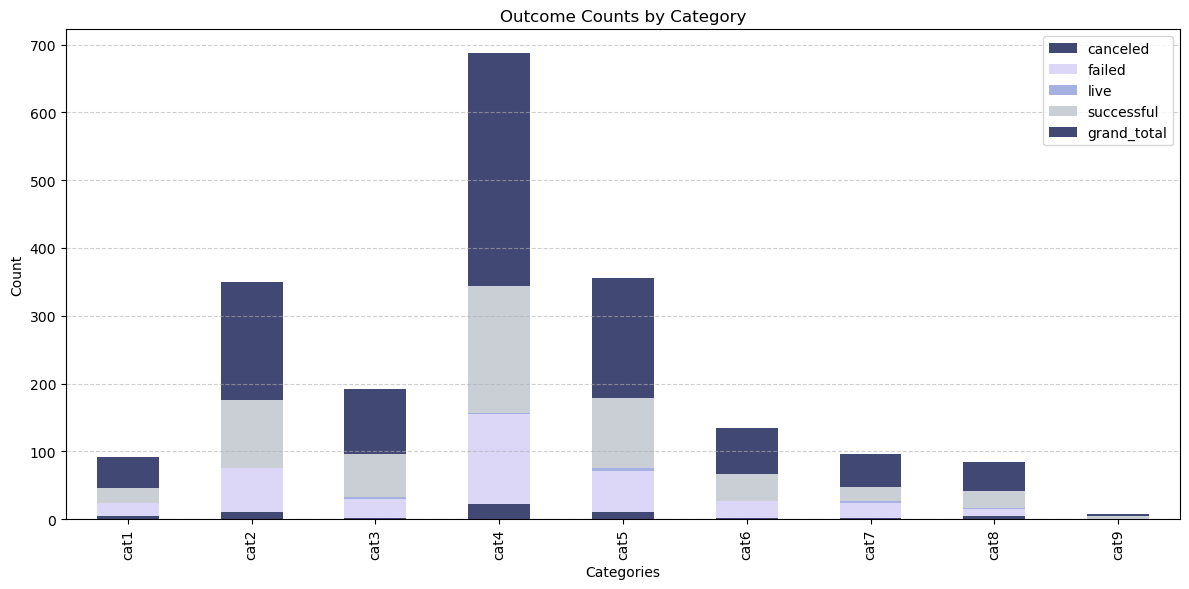

In [98]:

df.set_index('row_labels', inplace=True)
colors = ['#424874', '#DCD6F7', '#A6B1E1', '#CACFD6']
ax = df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Outcome Counts by Category')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
query = """
SELECT
    CASE
        WHEN goal < 1000 THEN '<1000'
        WHEN goal BETWEEN 1000 AND 4999 THEN '1000 to 4999'
        WHEN goal BETWEEN 5000 AND 9999 THEN '5000 to 9999'
        WHEN goal BETWEEN 10000 AND 14999 THEN '10000 to 14999'
        WHEN goal BETWEEN 15000 AND 19999 THEN '15000 to 19999'
        WHEN goal BETWEEN 20000 AND 24999 THEN '20000 to 24999'
        WHEN goal BETWEEN 25000 AND 29999 THEN '25000 to 29999'
        WHEN goal BETWEEN 30000 AND 34999 THEN '30000 to 34999'
        WHEN goal BETWEEN 35000 AND 39999 THEN '35000 to 39999'
        WHEN goal BETWEEN 40000 AND 44999 THEN '40000 to 44999'
        WHEN goal BETWEEN 45000 AND 49999 THEN '45000 to 49999'
        ELSE '>=50000'
    END AS Goal_Range,
    SUM(CASE WHEN outcome = 'successful' THEN 1 ELSE 0 END) AS Number_Successful,
    SUM(CASE WHEN outcome = 'failed' THEN 1 ELSE 0 END) AS Number_Failed,
    SUM(CASE WHEN outcome = 'canceled' THEN 1 ELSE 0 END) AS Number_Canceled,
    COUNT(*) AS Total_Projects,
    CONCAT(ROUND(SUM(CASE WHEN outcome = 'successful' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 0), '%') AS Percentage_Successful,
    CONCAT(ROUND(SUM(CASE WHEN outcome = 'failed' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 0), '%') AS Percentage_Failed,
    CONCAT(ROUND(SUM(CASE WHEN outcome = 'canceled' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 0), '%') AS Percentage_Canceled
FROM
    campaign
GROUP BY
    Goal_Range
ORDER BY
    MIN(goal);
"""
df = pd.read_sql(text(query), con=engine)
df.head(20)

,goal_range,number_successful,number_failed,number_canceled,total_projects,percentage_successful,percentage_failed,percentage_canceled
0,<1000,30,20,1,51,59%,39%,2%
1,1000 to 4999,191,38,2,234,82%,16%,1%
2,5000 to 9999,164,126,25,317,52%,40%,8%
3,10000 to 14999,4,5,0,9,44%,56%,0%
4,15000 to 19999,10,0,0,10,100%,0%,0%
5,20000 to 24999,7,0,0,7,100%,0%,0%
6,25000 to 29999,11,3,0,14,79%,21%,0%
7,30000 to 34999,7,0,0,7,100%,0%,0%
8,35000 to 39999,8,3,1,12,67%,25%,8%
9,40000 to 44999,11,3,0,15,73%,20%,0%


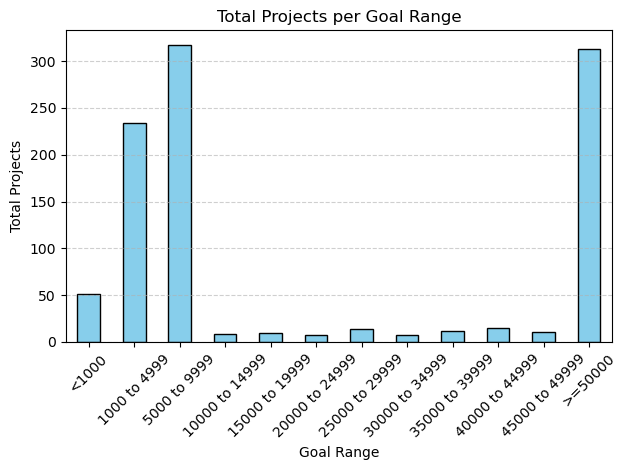

In [89]:
ax = df.plot(x='goal_range', y='total_projects', kind='bar', legend=None, title='Total Projects per Goal Range', color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Goal Range')
ax.set_ylabel('Total Projects')
ax.set_title('Total Projects per Goal Range')

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
query = """
SELECT
    outcome,
    AVG(backers_count) AS mean,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY backers_count) AS median,
    MIN(backers_count) AS minimum,
    MAX(backers_count) AS maximum,
    VARIANCE(backers_count) AS variance,
    STDDEV(backers_count) AS st_dev,
    MAX(backers_count) - MIN(backers_count) AS range
FROM
    campaign
WHERE
    outcome IN ('successful', 'failed')
GROUP BY
    outcome;
"""
df = pd.read_sql(text(query), con=engine)
df.head()

,outcome,mean,median,minimum,maximum,variance,st_dev,range
0,failed,585.615385,114.5,0,6080,9.241135e+05,961.308200,6080
1,successful,851.146903,201.0,16,7295,1.606217e+06,1267.366006,7279


In [52]:
query = """
    SELECT
        company_name,
        backers_count
    FROM
        campaign
    WHERE
        backers_count > 1000
          ;
"""
df = pd.read_sql(text(query), con=engine)
df.head(20)

,company_name,backers_count
0,Huff LLC,2179
1,Hensley Ltd,3483
2,Davis and Sons,5497
3,Landry Inc,1572
4,Henson PLC,2443
5,"Gordon, Mendez and Johnson",2230
6,Estrada Group,1229
7,Wright-Bryant,1460
8,Manning-Hamilton,2043
9,"Hernandez, Norton and Kelley",1122
